# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [1]:
import numpy as np
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [2]:
df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1
...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [3]:
# First lets check to see all possible values of the "class" column to see which correspond to passengers

df_titanic["class"].unique()

array(['3rd', '2nd', '1st', 'engineering crew', 'victualling crew',
       'restaurant staff', 'deck crew'], dtype=object)

In [5]:
# "3rd", "2nd", and "1st" correspond to passengers


passengers = df_titanic[df_titanic["class"].isin(["3rd", "2nd", "1st"])]
passengers

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.1100,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.0500,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.0500,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.0500,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.1300,1
...,...,...,...,...,...,...,...,...,...
1314,"Yvois, Miss. Henriette",female,24.0,2nd,S,France,248747.0,13.0000,0
1315,"Zakarian, Mr. Mapriededer",male,22.0,3rd,C,Turkey,2656.0,7.0406,0
1316,"Zakarian, Mr. Ortin",male,27.0,3rd,C,Turkey,2670.0,7.0406,0
1317,"Zenni, Mr. Philip",male,25.0,3rd,C,Lebanon,2620.0,7.0406,1


In [9]:
# To get the Joint Distribution between a passengers class and where they embarked used pd.crosstab
# but we need to use normalize=True to get proportions instead of totals to get the distributions

joint = pd.crosstab(passengers["class"], passengers["embarked"], normalize=True)
joint

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


To interpret the table above:

$$
\text{Cell 1}: 0.002278\\
P(\text{Class = 1st, Embarked = B}) = 0.002278
$$

## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked

$$
P(Class = c| Embarked = e) = \frac{P(Class = c, Embarked = e)}{P(Embarked = e)}
$$


In [16]:
# conditional distribution of class given embarkation
pd.crosstab(
    passengers["class"],
    passengers["embarked"],
    normalize="columns"
)

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481




* the conditional distribution of where they embarked given their class

$$
P(Embarked = e| Class = c) = \frac{P(Class = c, Embarked = e)}{P(Class = C)}
$$

In [13]:
# conditional distribution of class given embarkation
pd.crosstab(
    passengers["class"],
    passengers["embarked"],
    normalize="index"
)

embarked,B,C,Q,S
class,,,,
1st,0.333333,0.527675,0.024390,0.191466
2nd,0.666667,0.095941,0.056911,0.268053
3rd,0.000000,0.376384,0.918699,0.540481


Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?

$$
P(Embarked = S| Class = 3rd) = 0.6967559943582511
$$

In [15]:
pd.crosstab(passengers["class"], passengers["embarked"], normalize="index").loc["3rd", "S"]

np.float64(0.6967559943582511)

* What proportion of Southampton passengers were in 3rd class?

$$
P(Class = 3rd| Embarked = S) = 0.5404814004376368
$$

In [17]:
pd.crosstab(passengers["class"], passengers["embarked"], normalize="columns").loc["3rd", "S"]

np.float64(0.5404814004376368)

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

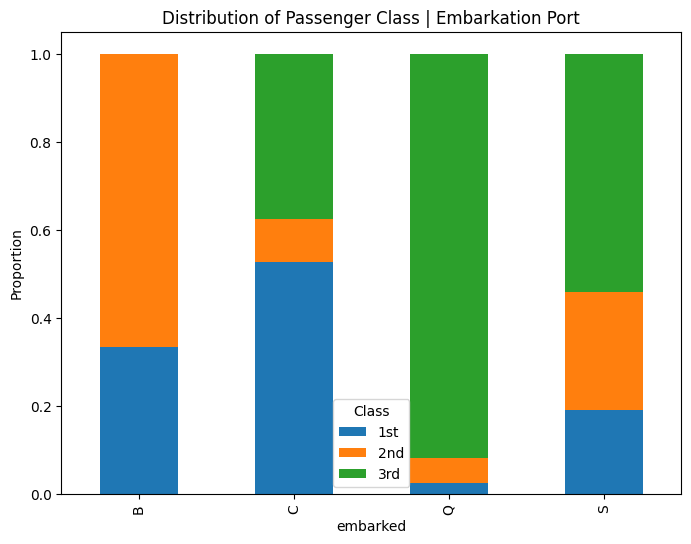

In [19]:
import matplotlib.pyplot as plt

cond_class_given_embarked = pd.crosstab(
    passengers["class"],
    passengers["embarked"],
    normalize="columns"
)

cond_class_given_embarked.T.plot(
    kind="bar",
    stacked=True,
    figsize=(8,6)
)

plt.ylabel("Proportion")
plt.title("Distribution of Passenger Class | Embarkation Port")
plt.legend(title="Class")
plt.show()

Use the table when you need exact probabilities to plug into answers (like “what proportion of 3rd class embarked at Southampton?”).

Use the visualization when you need to communicate patterns or compare distributions across categories quickly.